# Data: Demographic
TEAM 13

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

The columns in the table are:

**demographics.csv**:
- **zipcode**: (Integer) Zipcode of the region.
- **age brackets (13 total)**: (Integer) Number of people in given age bracket
- **households**: (Integer) Total household (Including singles)
- **Income brackets (9 Total)**: (Float) Percentaje of households in given income brackets
- **median_household_income**: (Integer) Median household income
- **mean_household_income**: (Integer) Mean household income

## Data Exploration

In [2]:
#Import sd with PANDAS
df=pd.read_csv('datasets/demographics.csv', delimiter=',')
df.head()

,zipcode,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,55-59_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
0,601,17982,1006,1080,1342,1352,1321,2253,2149,2434,...,48.1,12,12.8,8.6,8.7,6.2,1.4,16.3,10816,20349
1,602,40260,2006,2440,2421,2953,2865,5124,5139,5947,...,31.4,16.3,17.9,12.2,10.6,7.7,2.9,21.2,16079,23282
2,603,52408,2664,3177,3351,3685,3585,6473,6775,6678,...,31,14.9,17.5,11.7,10.8,8.7,2.4,21.9,16804,26820
3,606,6331,347,331,461,474,469,707,933,776,...,45.3,10.2,20,11.7,11,1.8,0,12.8,12512,15730
4,610,28328,1438,1490,2044,2122,1985,3358,3778,3858,...,26.9,14.8,23.7,15.2,9.3,7.5,1.6,18.4,17475,23360


In [41]:
df.shape
#df.dtypes
#df.columns

(33120, 26)

The relevant features we will use in this case from demographics table are:

1. **zipcode:** Is a key variable with other tables
2. **age brackets:** It will reduce the number of variable to resume the demographic description
3. **median_household_income:** marital status ("single", "married" or "divorced")
4. **mean_household_income:** different levels of education ("primary","secondary","tertiary","unknown")

*age brackets*

In [4]:
df2=df.iloc[:,[0]]
#df2

In [5]:
df2['5-19_years'] = df[["5-9_years","10-14_years","15-19_years"]].sum(axis =1)
df2['20-44_years'] = df[["20-24_years","25-34_years","35-44_years"]].sum(axis =1)
df2['45-64_years'] = df[["45-54_years","55-59_years","60-64_years"]].sum(axis =1)
df2['65_years_or_more'] = df[["65-74_years","75-84_years","85_years_or_more"]].sum(axis =1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [6]:
df2.columns

Index(['zipcode', '5-19_years', '20-44_years', '45-64_years',
       '65_years_or_more'],
      dtype='object')

In [7]:
df2 = pd.concat([df2, df['median_household_income'],df['mean_household_income']], axis=1,)
df2

,zipcode,5-19_years,20-44_years,45-64_years,65_years_or_more,median_household_income,mean_household_income
0,601,3428,4926,5812,3503,10816,20349
1,602,6867,10942,13659,8169,16079,23282
2,603,9192,13743,16588,12138,16804,26820
3,606,1139,1650,1955,1427,12512,15730
4,610,4972,7465,9385,6083,17475,23360
5,612,11635,17115,20155,14226,17229,25590
6,616,1612,2651,3702,2472,13705,20605
7,617,4807,6752,7759,5034,15361,21487
8,622,1328,1742,2228,2022,15689,29228
9,623,7436,10486,14436,9639,16593,24732


**MIX TABLES**

Observing the other tables, we could found that some of them has a zipcode field, in this way, that could be a good key to cross the tables.
pd.crosstab(df[""],df[])

*Table=Listings*

In [8]:
dl=pd.read_csv('listings.csv', delimiter=',')
dl.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode'],
      dtype='object')

In [9]:
#Interest fields
dl1 = dl.iloc[:,[10,11,13,14,15,17,18,27,28]]
dl1.columns

Index(['host_id', 'id', 'latitude', 'longitude', 'metropolitan', 'price',
       'property_type', 'weekly_price', 'zipcode'],
      dtype='object')

*Table=real_estate*

In [10]:
ds=pd.read_csv('datasets/real_estate.csv', delimiter=',')
ds.columns

Index(['type', 'zipcode', 'city', 'state', 'metro', 'county', 'size_rank',
       '1996-04', '1996-05', '1996-06',
       ...
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06'],
      dtype='object', length=262)

In [11]:
#Interest fields
ds1 = ds.iloc[:,[0,1,2,3,4,5]]
ds1.columns

Index(['type', 'zipcode', 'city', 'state', 'metro', 'county'], dtype='object')

In [12]:
#pd.value_counts(ds1['state'])

In [40]:
##Cross Data: "demographics" and "real_estate" through field -zipcode-
#db = pd.merge (df2,ds1, on = ['zipcode'], how = 'inner') 
db.shape


(73788, 21)

In [14]:
db['zipcode']=db['zipcode'].astype(str)

In [15]:
#Cross Data: "db" and "listings" through field -zipcode-
db = pd.merge (db,dl1, on = ['zipcode'], how = 'inner') 
db.dtypes

zipcode                     object
5-19_years                   int64
20-44_years                  int64
45-64_years                  int64
65_years_or_more             int64
median_household_income     object
mean_household_income       object
type                        object
city                        object
state                       object
metro                       object
county                      object
host_id                      int64
id                           int64
latitude                   float64
longitude                  float64
metropolitan                object
price                      float64
property_type               object
weekly_price               float64
dtype: object

pend: RENOMBRAR VARIABLES EXTERNAS

In [16]:
db.describe()

,5-19_years,20-44_years,45-64_years,65_years_or_more,host_id,id,latitude,longitude,price,weekly_price
count,73788.000000,73788.000000,73788.000000,73788.000000,7.378800e+04,7.378800e+04,73788.000000,73788.000000,73788.000000,16233.000000
mean,9478.822383,21121.980322,18289.736800,8164.110668,3.176802e+07,1.043429e+07,40.508301,-76.489662,161.292229,836.928356
std,6308.020821,9103.192380,7837.374805,3982.954789,3.296683e+07,5.593738e+06,0.910044,4.646467,258.662667,711.375278
min,5.000000,492.000000,272.000000,38.000000,7.200000e+01,2.384000e+03,38.823403,-87.844039,0.000000,70.000000
25%,4246.000000,13828.000000,11688.000000,4962.000000,5.380970e+06,5.815780e+06,40.652184,-77.019635,69.000000,450.000000
50%,7566.000000,21804.000000,18105.000000,7914.000000,1.980017e+07,1.124046e+07,40.704973,-73.982170,100.000000,650.000000
75%,13675.000000,28587.000000,24994.000000,9952.000000,4.790067e+07,1.564164e+07,40.767030,-73.947566,175.000000,1000.000000
max,29518.000000,39368.000000,36223.000000,19611.000000,1.297105e+08,1.867079e+07,42.022298,-73.712936,10000.000000,14000.000000


*Null or random values*

In [17]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73788 entries, 0 to 73787
Data columns (total 20 columns):
zipcode                    73788 non-null object
5-19_years                 73788 non-null int64
20-44_years                73788 non-null int64
45-64_years                73788 non-null int64
65_years_or_more           73788 non-null int64
median_household_income    73788 non-null object
mean_household_income      73788 non-null object
type                       73788 non-null object
city                       73788 non-null object
state                      73788 non-null object
metro                      73788 non-null object
county                     73788 non-null object
host_id                    73788 non-null int64
id                         73788 non-null int64
latitude                   73788 non-null float64
longitude                  73788 non-null float64
metropolitan               73788 non-null object
price                      73788 non-null float64
property_typ

In [18]:
db = db[db.mean_household_income != 'N']

In [19]:
db['mean2_household_income'] = db['mean_household_income'].astype(str).astype(int)
#prueba['median2_household_income'] = prueba['median_household_income'].astype(str).astype(int)
db.dtypes

zipcode                     object
5-19_years                   int64
20-44_years                  int64
45-64_years                  int64
65_years_or_more             int64
median_household_income     object
mean_household_income       object
type                        object
city                        object
state                       object
metro                       object
county                      object
host_id                      int64
id                           int64
latitude                   float64
longitude                  float64
metropolitan                object
price                      float64
property_type               object
weekly_price               float64
mean2_household_income       int64
dtype: object

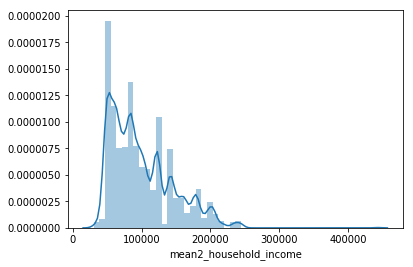

In [20]:
sns.distplot(db['mean2_household_income'])



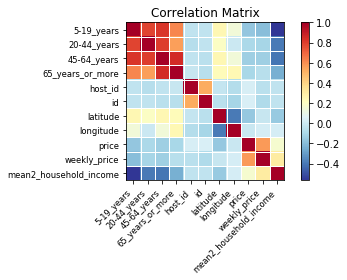

In [21]:
##Correlacion de las variables con el ingreso medio 
corr = db.set_index('mean_household_income').corr()
sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()


In [22]:
corr = db.corr()
corr[['mean2_household_income']].sort_values(by = 'mean2_household_income',ascending = False)\
.style.background_gradient()

,mean2_household_income
mean2_household_income,1
weekly_price,0.314227
price,0.172701
longitude,0.0308375
id,-0.0279709
host_id,-0.0297335
latitude,-0.144491
65_years_or_more,-0.234813
20-44_years,-0.388306
45-64_years,-0.40435


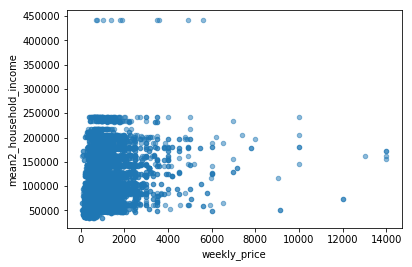

In [23]:
# Diagrama de dispersión mean_household_income/weekly_price:
var = 'weekly_price'
data = pd.concat([db['mean2_household_income'], db[var]], axis=1)
data.plot.scatter(x=var, y='mean2_household_income', alpha = 0.5);



In [24]:
db.dtypes

zipcode                     object
5-19_years                   int64
20-44_years                  int64
45-64_years                  int64
65_years_or_more             int64
median_household_income     object
mean_household_income       object
type                        object
city                        object
state                       object
metro                       object
county                      object
host_id                      int64
id                           int64
latitude                   float64
longitude                  float64
metropolitan                object
price                      float64
property_type               object
weekly_price               float64
mean2_household_income       int64
dtype: object

In [25]:
db2 = pd.melt(db, id_vars=['zipcode','median_household_income', 'mean_household_income',
       'type', 'city', 'state', 'metro', 'county', 'host_id', 'id', 'latitude',
       'longitude', 'metropolitan', 'price', 'property_type', 'weekly_price',
       'mean2_household_income'], 
    value_vars=['5-19_years', '20-44_years', '45-64_years',
       '65_years_or_more'],var_name='age_range', value_name='age_number')
#Emissions_df_1 = Emissions_df_1.sort(["Year", "Indicator Value"])
db2.head()

,zipcode,median_household_income,mean_household_income,type,city,state,metro,county,host_id,id,latitude,longitude,metropolitan,price,property_type,weekly_price,mean2_household_income,age_range,age_number
0,10001,86801,158183,ZRI,New York,NY,New York,New York,4041109,12383312,40.748419,-74.002353,NYC,300.0,Apartment,NaN,158183,5-19_years,2551
1,10001,86801,158183,ZRI,New York,NY,New York,New York,18939173,16010302,40.751332,-73.999645,NYC,275.0,Apartment,NaN,158183,5-19_years,2551
2,10001,86801,158183,ZRI,New York,NY,New York,New York,6150652,5917981,40.744015,-73.992723,NYC,349.0,Apartment,NaN,158183,5-19_years,2551
3,10001,86801,158183,ZRI,New York,NY,New York,New York,28570275,9212510,40.747990,-73.999931,NYC,450.0,Apartment,NaN,158183,5-19_years,2551
4,10001,86801,158183,ZRI,New York,NY,New York,New York,1408733,268868,40.751144,-74.001947,NYC,225.0,Apartment,NaN,158183,5-19_years,2551


In [26]:
db2.dtypes

zipcode                     object
median_household_income     object
mean_household_income       object
type                        object
city                        object
state                       object
metro                       object
county                      object
host_id                      int64
id                           int64
latitude                   float64
longitude                  float64
metropolitan                object
price                      float64
property_type               object
weekly_price               float64
mean2_household_income       int64
age_range                   object
age_number                   int64
dtype: object

In [27]:
#dbb.set_index('city', inplace=True)
#dbb.groupby('state')['mean2_household_income'].plot(legend=True)
resume = db.groupby(by = ['state']).median()
resume

,5-19_years,20-44_years,45-64_years,65_years_or_more,host_id,id,latitude,longitude,price,weekly_price,mean2_household_income
state,,,,,,,,,,,
DC,4246.0,19750.0,11688.0,4761.0,22456488.0,13347248.0,38.912013,-77.022779,125.0,680.0,106670.0
IL,7527.0,22033.0,16556.0,6990.0,25626446.0,13075439.0,41.909059,-87.662013,99.0,600.0,84413.0
MD,5596.0,10936.0,13063.5,6097.0,42477462.5,16231223.5,38.945087,-76.977031,80.0,450.0,83582.0
NY,10447.0,21804.0,20163.0,9585.0,17609519.0,9978187.5,40.709414,-73.955607,100.0,650.0,79957.0


*MEAN HOUSEHOLD INCOME BY CITY AND STATE*

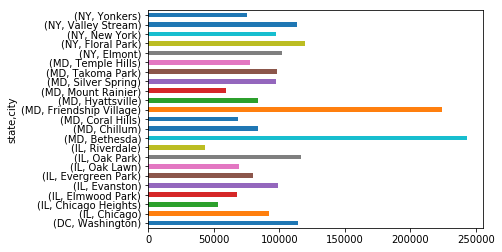

In [28]:
db.groupby(by = ['state','city'])['mean2_household_income'].mean().plot(kind = 'barh')

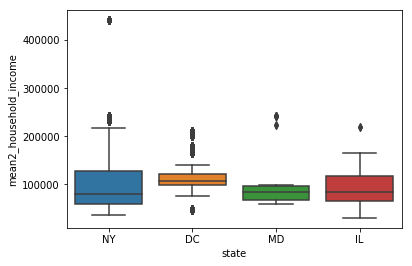

In [29]:

sns.boxplot(x=db["state"], y=db["mean2_household_income"] )


### Conclusions

- Demographic table give us information about that can help us characterize some states in EEUU since the age from their population and the mean houshold income. Is not very relevant to the analysis that we want to share in the investigative focus, but is important to give context about demographic context in the country.

- One of hope results was that maybe the higuer income household would produce increase in the weekly price in airbnb, but the correlation matrix show us the index in 0.314227, low to represent a relation. 

- Cities with higuer mean income household are: Friendship Village and Bethesda in Maryland.



### Hypothesis test

After analyse the interest variables, it will suppose perform a statistical test to assess the hypothesis of management:

$$ H_0: \mu= 79957$$
$$ H_a: \mu \neq 79957$$

There are two possible outcomes for this test: (1) We conclude $H_0$ is false, and say we **reject $H_0$**. In this case we will conclude that there is statistical evidence for the alternative $H_a$ and that the bank balance of customers this year is indeed different from 1341.12 USD. Or (2) we **fail to reject $H_0$**. In this case, we conclude that there is not enough statistical evidence to say for sure that $H_0$ is false. **Notice that in the second case we cannot say that the original hypothesis is true.** (In fact, there is no test out there that will tell you that a hypothesis is true. Why do you think that is?)

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats

In [38]:
#stats.ttest_1samp(db[db.state == 'DC' ], popmean=79957)
stats.ttest_1samp(db['mean2_household_income'], popmean=79957)

Ttest_1sampResult(statistic=121.38746534056975, pvalue=0.0)